In [ ]:
'''
In this notebook, a Regression problem 'House Pricing Prediction' is being tried to solve here. Problem is to predict the house 
pricing based on several input features such as Location, # of Bed rooms, SF area etc.

Here we have following parts. 
A. In section-3, 
    a. Label encoder is used to convert all categorical attributes into Continious values. Label encoder files has been saved which will be used while model testing 
    b. Scaler is used to normalize the numeric values into a given range and same file has been saved for future purpose
    c. Model is trained using 'LinearRegressor' algorithm and saved as a pickle file. Pickle file will be used for model offline testing. 
    
B. In Section-4, 
    a. Label encoder file and Scalar file are used to transform the test data into desired format 
    b. then model pickle file is used to test the model against test data.

C. In remaining sections - we have trained models using different algorithms and checked the performance 
    a. DecisionTreeRegressor
    b. RandomForestRegressor
    c. SVR
    d. GradientBoostingRegressor
'''

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
from sklearn.preprocessing import StandardScaler

train = pd.read_csv('housing_train.csv')
test = pd.read_csv('housing_test.csv')

n_train = train.shape[0]
n_test = test.shape[0]

y = train['SalePrice'].values

data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)
data.head()

data = data[['LotArea','Street', 'Neighborhood','Condition1', 'Condition2','BldgType','HouseStyle','OverallCond', 'Heating','CentralAir','Electrical','1stFlrSF','2ndFlrSF','BsmtHalfBath','FullBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars','GarageArea','PoolArea']]
data['BsmtHalfBath'] = data['BsmtHalfBath'].fillna(data['BsmtHalfBath'].mean())
data['Electrical'] = data['Electrical'].fillna('SBrkr')
data['GarageCars'] = data['GarageCars'].fillna(data['GarageCars'].mean())
data['GarageArea'] = data['GarageArea'].fillna(data['GarageArea'].mean())

C:\Users\618757\Anaconda3\envs\mypika\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


In [3]:
# In this section, we are training a model and creating a pickle file for that trained model.

categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols = data.columns[categorical_feature_mask].tolist()

from sklearn.preprocessing import LabelEncoder
import pickle
for col in categorical_cols:
    labelencoder = LabelEncoder()
    data[col] = labelencoder.fit_transform(data[col])
    pickle_label_out = open("le_housing_0810_"+col+".pickle","wb")                        
    pickle.dump(labelencoder, pickle_label_out)
    pickle_label_out.close()
    
# labelencoder = LabelEncoder()
# data[categorical_cols] = data[categorical_cols].apply(lambda col: labelencoder.fit_transform(col))

train =data[:n_train]
test = data[n_train:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=101)

y_train= y_train.reshape(-1,1)
y_test= y_test.reshape(-1,1)

 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

from sklearn.externals import joblib
x_scaler_filename = "house_pricing_scaler_x.save"
y_scaler_filename = "house_pricing_scaler_y.save"
joblib.dump(sc_X, x_scaler_filename) 
joblib.dump(sc_y, y_scaler_filename) 

x_scaler = joblib.load(x_scaler_filename) 
y_scaler = joblib.load(y_scaler_filename) 

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lrmodel = lm.fit(X_train,y_train)
with open('housing1_lr_model_pkl_0810.pkl', 'wb') as fid:
    pickle.dump(lrmodel, fid)

lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

C:\Users\618757\Anaconda3\envs\mypika\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\618757\Anaconda3\envs\mypika\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\618757\Anaconda3\envs\mypika\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\618757\Anaconda3\envs\mypika\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\618757\Anaconda3\envs\mypika\li

MAE: 0.37610921827898774
MSE: 0.4496529199297025
RMSE: 0.6705616451376432


In [4]:
# In this section, we are testing a model against test data 

test_data = pd.read_csv('housing_train.csv')
mydata = test_data
y = mydata['SalePrice'].values
mydata.drop(['SalePrice'], axis=1, inplace=True)

mydata = mydata[['LotArea','Street', 'Neighborhood','Condition1', 'Condition2','BldgType', 'Electrical', 'HouseStyle','OverallCond', 'Heating','CentralAir','1stFlrSF','2ndFlrSF','BsmtHalfBath','FullBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars','GarageArea','PoolArea']]
mydata['BsmtHalfBath'] = mydata['BsmtHalfBath'].fillna(mydata['BsmtHalfBath'].mean())
mydata['Electrical'] = mydata['Electrical'].fillna('SBrkr')
mydata['GarageCars'] = mydata['GarageCars'].fillna(mydata['GarageCars'].mean())
mydata['GarageArea'] = mydata['GarageArea'].fillna(mydata['GarageArea'].mean())

for col in categorical_cols:
    pickle_label_in = open("le_housing_0810_"+col+".pickle","rb")
    label_encoded_pickle = pickle.load(pickle_label_in)
    mydata[col] = label_encoded_pickle.transform(mydata[col])
    
X_train_my, X_test_my, y_train_my, y_test_my = train_test_split(mydata, y, test_size=0.2, random_state=101)
y_train_my= y_train_my.reshape(-1,1)
y_test_my= y_test_my.reshape(-1,1)

y= y.reshape(-1,1)


x_scaler = joblib.load(x_scaler_filename) 
y_scaler = joblib.load(y_scaler_filename) 
mydata = x_scaler.transform(mydata)
y = y_scaler.transform(y)

with open('housing1_lr_model_pkl_0810.pkl', 'rb') as fid:
    sv = pickle.load(fid)

predictions_my = sv.predict(mydata)
predictions_my= predictions_my.reshape(-1,1)

print('MAE:', metrics.mean_absolute_error(y, predictions_my))
print('MSE:', metrics.mean_squared_error(y, predictions_my))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions_my)))

C:\Users\618757\Anaconda3\envs\mypika\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\618757\Anaconda3\envs\mypika\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\618757\Anaconda3\envs\mypika\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

MAE: 0.6191904869896129
MSE: 0.6138041479666484
RMSE: 0.7834565386584302


C:\Users\618757\Anaconda3\envs\mypika\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
C:\Users\618757\Anaconda3\envs\mypika\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

C:\Users\618757\Anaconda3\envs\mypika\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 0.30139233645940366
MSE: 0.26366659108372825
RMSE: 0.5134847525328559


In [6]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 0)
dtreg.fit(X_train, y_train)
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

MAE: 0.4152492258979335
MSE: 0.46612158456766417
RMSE: 0.6827309752513534


In [7]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

MAE: 0.2921760503170203
MSE: 0.2138803803319788
RMSE: 0.46247203194569375


C:\Users\618757\Anaconda3\envs\mypika\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 500, random_state = 0)
rfr.fit(X_train, y_train)
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

C:\Users\618757\Anaconda3\envs\mypika\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MAE: 0.3098351261295739
MSE: 0.2578359816923289
RMSE: 0.5077755229354098


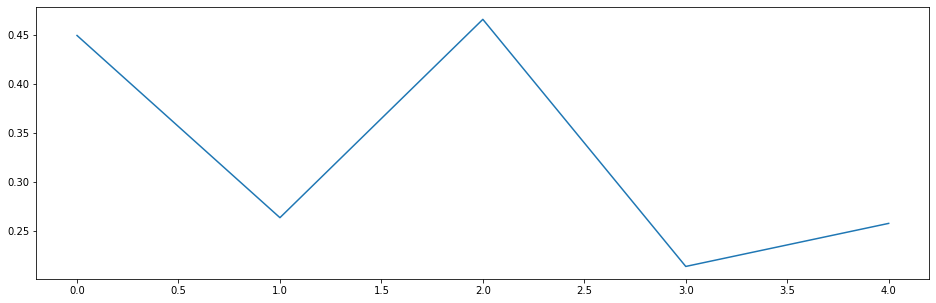

In [9]:
#We can say the best working model by loking MSE rates The best working model is Support Vector Machine. 
#We are going to see the error rate. which one is better?
#Model Comparison

error_rate=np.array([metrics.mean_squared_error(y_test, predictions),metrics.mean_squared_error(y_test, clf_pred),metrics.mean_squared_error(y_test, dtr_pred),metrics.mean_squared_error(y_test, svr_pred),metrics.mean_squared_error(y_test, rfr_pred)])
plt.figure(figsize=(16,5))
plt.plot(error_rate)